In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [9]:
df = pd.read_csv("./bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


### 1.Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

In [ ]:
df['price_per_sqft'].describe().astype(int)

count       13200
mean         7920
std        106727
min           267
25%          4267
50%          5438
75%          7317
max      12000000
Name: price_per_sqft, dtype: int64

In [20]:
low_bound,max_bound= df.price_per_sqft.quantile([0.001,0.999])

df_cleaned = df[(df['price_per_sqft']>=low_bound) & (df['price_per_sqft']<=max_bound)]
df_cleaned.price_per_sqft.describe().astype(int)

count    13172
mean      6663
std       4141
min       1379
25%       4271
50%       5438
75%       7311
max      50349
Name: price_per_sqft, dtype: int64

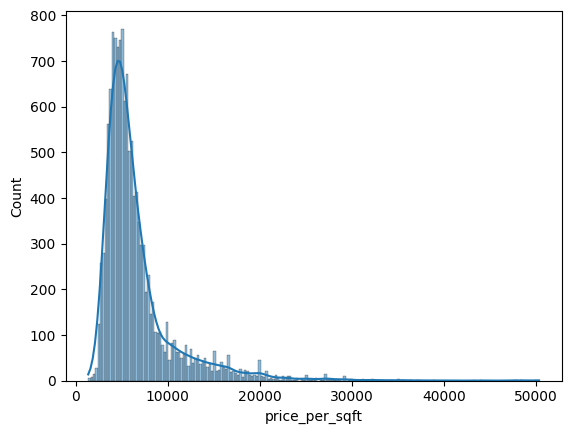

In [24]:
sns.histplot(df_cleaned['price_per_sqft'],kde=True)
plt.show()

### 3.Use 4 standard deviation to remove outliers

In [ ]:
df_cleaned.price_per_sqft.describe().astype(int)

count    13172
mean      6663
std       4141
min       1379
25%       4271
50%       5438
75%       7311
max      50349
Name: price_per_sqft, dtype: int64

In [29]:
std_deviation = df_cleaned.price_per_sqft.std()
mean = df_cleaned.price_per_sqft.mean()
std_deviation,mean

(np.float64(4141.020700174613), np.float64(6663.6537351958705))

In [30]:
mean - 4*std_deviation

np.float64(-9900.429065502582)

In [31]:
mean + 4*std_deviation

np.float64(23227.73653589432)

<Axes: xlabel='price_per_sqft', ylabel='Count'>

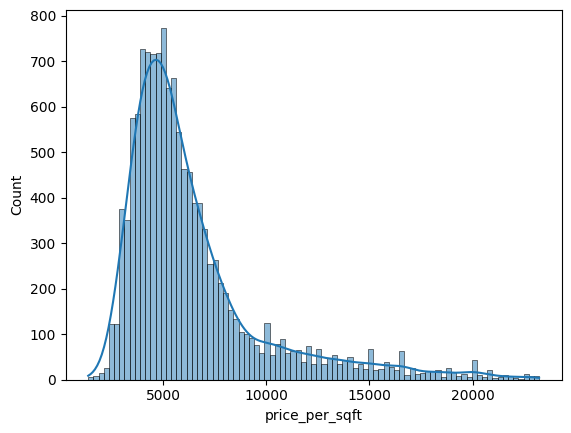

In [33]:
df_std = df_cleaned[(df_cleaned['price_per_sqft']>=mean - 4*std_deviation) & (df_cleaned['price_per_sqft']<=mean + 4*std_deviation)]
sns.histplot(df_std['price_per_sqft'],kde=True)

### 5.On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

<Axes: xlabel='zscore', ylabel='Count'>

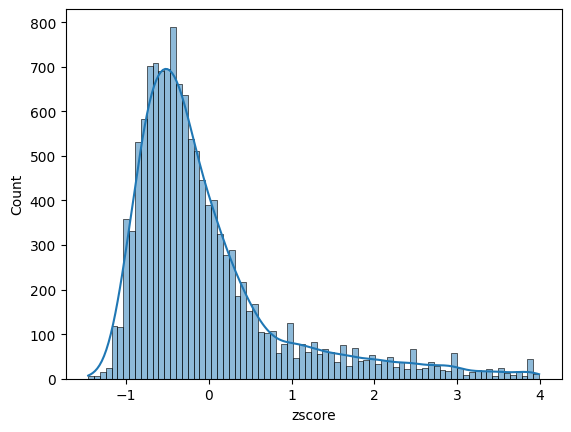

In [37]:
df_cleaned['zscore'] = (df_cleaned['price_per_sqft'] - df_cleaned['price_per_sqft'].mean())/df_cleaned['price_per_sqft'].std()
df_cleaned = df_cleaned[abs(df_cleaned['zscore'])<=4]
sns.histplot(df_cleaned['zscore'],kde=True)